In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [21]:
houses = pd.read_csv('Boston.csv')

In [22]:
houses.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [23]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [24]:
scaler = StandardScaler()
y = houses['medv'].values
X = houses.drop('medv', axis=1).values
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

In [25]:
class LinearReg():

    def __init__(self, learningRate, numberOfIterations):
        self.learningRate = learningRate
        self.numberOfIterations = numberOfIterations
    
    def fit(self, X, y):
        self.rows, self.cols = X.shape
        self.weights = np.zeros(self.cols)
        self.biases = 0
        self.X = X
        self.y = y

        for i in range(self.numberOfIterations):
            self.update_weights()
    
    def update_weights(self):

        predictions = self.predict(self.X)
        dw = - (2 / self.rows) * self.X.T.dot(self.y - predictions)
    
    
        db = - (2 / self.rows) * np.sum(self.y - predictions)

        self.weights = self.weights - self.learningRate * dw
        self.biases = self.biases - self.learningRate * db


    def predict(self, X):
        return X.dot(self.weights) + self.biases

In [26]:
model = LinearReg(learningRate = 0.01, numberOfIterations=2000)
model.fit(X_train, y_train)

In [27]:
y_pred = model.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 22.04606096813192
Mean Absolute Error (MAE): 3.2192897083757783
R-squared (R²): 0.7041317261064235


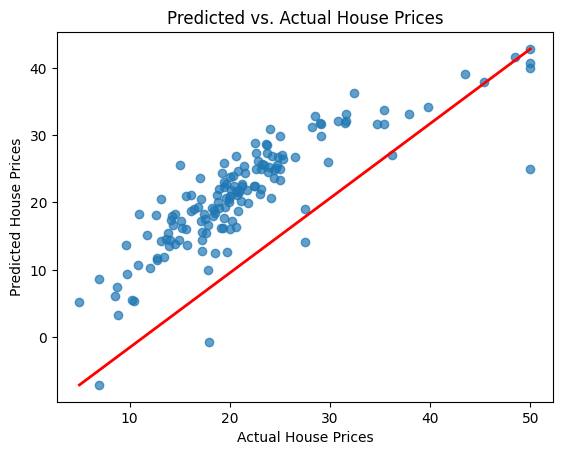

In [29]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Predicted vs. Actual House Prices')
# Plot a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', lw=2)
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression

model_2 = LinearRegression()

model_2.fit(X_train, y_train)

y_pred2 = model_2.predict(X_test)


In [31]:
mse = mean_squared_error(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 21.969368008053944
Mean Absolute Error (MAE): 3.2116643377514227
R-squared (R²): 0.7051609808903443


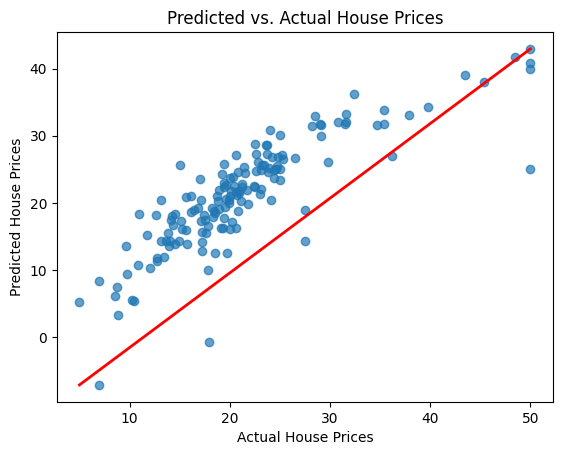

In [ ]:
plt.scatter(y_test, y_pred2, alpha=0.7)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Predicted vs. Actual House Prices')
plt.plot([min(y_test), max(y_test)], [min(y_pred2), max(y_pred2)], color='red', lw=2)
plt.show()